Chapter 19
# 可视化巴都万数列
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

$${\displaystyle P(0)=P(1)=P(2)=1,}$$
$${\displaystyle P(n)=P(n-2)+P(n-3).}$$

1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12, 16, 21, 28, 37, 49, 65, 86, 114, 151, 200, 265

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## 自定义函数

In [9]:
# 给定等边三角形的两个顶点坐标，计算第三个顶点坐标
def get_vertex(p1, p2):
    
    theta = 60
    theta = theta * np.pi/180
    # 旋转60度
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    v = p2 - p1
    p3 = p1 + R @ v
    return p3

# 绘制等边三角形
def draw_triangle(triangle, colour):

    v0, v1, v2 = triangle
    poly = Polygon((v0, v1, v2), 
                   facecolor=colour, 
                   edgecolor='k', 
                   linewidth=2, 
                   joinstyle='bevel')
    
    ax.add_patch(poly)

## 产生数列

In [3]:
num = 12
P = [1, 1, 1, 2]
for i in range(4, num):
    P.append(P[i-2] + P[i-3])
print(P)

[1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12, 16]


## 等边三角形顶点位置

In [4]:
V0 = np.array([0, 0])
V1 = np.array([1, 0])
V2 = get_vertex(V0, V1)
V3 = get_vertex(V2, V1)
V4 = get_vertex(V2, V3)
V5 = get_vertex(V0, V4)
V6 = get_vertex(V0, V5)
V7 = get_vertex(V1, V6)

In [5]:
# 创建空数组，用来保存三角形顶点坐标
T = np.empty((num, 3, 2))
# num为三角形数量，3是顶点数量，2代表横纵坐标 (2维平面)

# 前六个等边三角形的顶点坐标
T[:6] = [(V0, V1, V2), 
         (V2, V1, V3), 
         (V2, V3, V4), 
         (V0, V4, V5), 
         (V0, V5, V6),
         (V1, V6, V7)]

In [5]:
# 从第7个三角形开始存在如下规律

for i in range(6, num):
    V0, V1 = T[i-4][1], T[i-1][2]
    T[i] = (V0, V1, get_vertex(V0, V1))

## 可视化

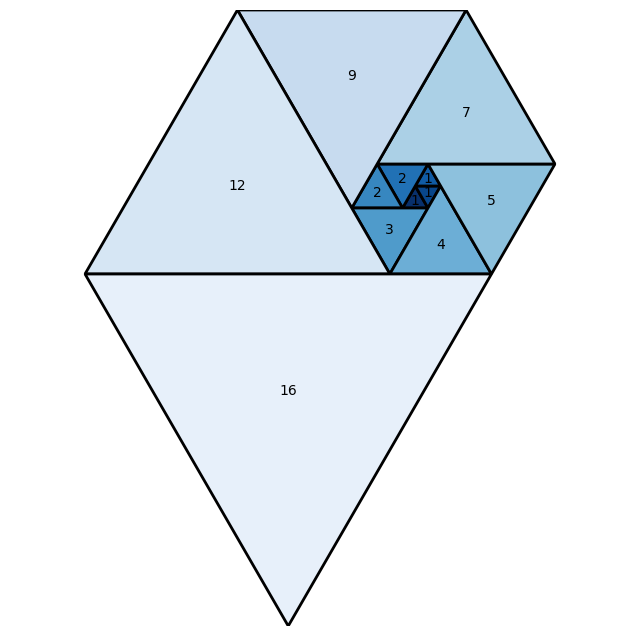

In [6]:
fig, ax = plt.subplots(figsize = (8,8))

colors = plt.cm.Blues_r(np.linspace(0,1,len(T) + 1))

for i in range(len(T)):

    draw_triangle(T[i], colors[i])
    ax.annotate(str(P[i]), np.mean(T[i], axis=0), 
                va='center', ha='center')

ax.axis('equal')
xmax = np.max(T[:,:,0])
xmin = np.min(T[:,:,0])
ymax = np.max(T[:,:,1])
ymin = np.min(T[:,:,1])
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.axis('off')
plt.show()

参考：  
https://scipython.com/blog/illustrating-the-padovan-sequence/